### Alternate formulation by explicitly including boundary nodes

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

Finite-dfferences solution to 

$$ D \frac{d^2 c(x)}{dx^2} - k c^2(x) = 0 $$

with the boundary conditions:

$$ c(0) = lb, \;\; c(L) = rb $$

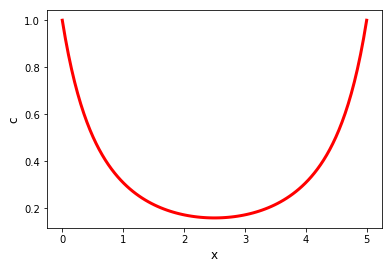

In [7]:
L = 5
N = 100
lb = 1
rb = 1

delta = L/(N-1)
D = 0.5
k = 2

def diffusion(c):
    
    retval = np.zeros(N)
    
    # right boundary -- directly solve for this
    retval[0] = c[0] - lb
    
    # interior
    for i in range(1,N-1):
        retval[i] = D/delta/delta*(c[i-1] - 2*c[i] + c[i+1]) - k*c[i]**2
    
    # left boundary
    retval[-1] = c[-1] - rb
    
    return retval
    

sol = root(diffusion,np.ones(N))
c = sol.x
# define domain
x = np.linspace(0,L,N)

plt.plot(x,c,lw=3,color='r')
plt.xlabel('x',fontsize=12)
plt.ylabel('c',fontsize=12)
plt.show()

### Vectorized version

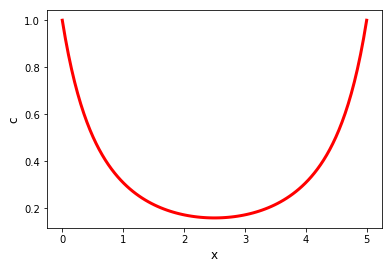

In [10]:
L = 5
N = 100
lb = 1
rb = 1

delta = L/(N-1)
D = 0.5
k = 2

def diffusion(c):
    
    retval = np.zeros(N)
    
    # right boundary
    retval[0] = c[0] - lb
    
    # interior
    retval[1:-1] = D/delta/delta*(c[:-2] - 2*c[1:-1] + c[2:]) - k*c[1:-1]**2
    
    # left boundary
    retval[-1] = c[-1] - rb
    
    return retval
    

sol = root(diffusion,np.ones(N))

c = sol.x

# definte domain
x = np.linspace(0,L,N)

plt.plot(x,c,lw=3,color='r')
plt.xlabel('x',fontsize=12)
plt.ylabel('c',fontsize=12)
plt.show()

Finite-dfferences solution to the Airy equation: 

$$ \frac{d^2 y(x)}{dx^2} - xy(x) = 0 $$

with the boundary conditions:

$$ c(-10) = 1, \;\; c(10) = 1 $$

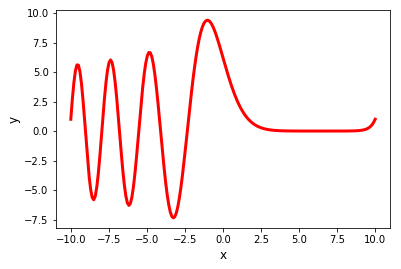

In [12]:
L = 20
N = 200
lb = 1
rb = 1

delta = L/(N-1)

def diffusion(y):
    
    retval = np.zeros(N)
    x = np.linspace(-10,10,N+2)
    
    # eliminate endpoints
    x = x[1:-1]
    
    # right boundary
    retval[0] = lb - y[0]
    
    # interior
    retval[1:-1] = 1/delta/delta*(y[:-2] - 2*y[1:-1] + y[2:]) - x[1:-1]*y[1:-1]
    
    # left boundary
    retval[-1] = rb - y[-1]
    
    return retval
    

sol = root(diffusion,np.ones(N))
y = sol.x

x = np.linspace(-10,10,N)

plt.plot(x,y,lw=3,color='r')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.show()

Finite-dfferences solution to 

$$ D \frac{d^2 c(x)}{dx^2} - k c^2(x) = 0 $$

with the boundary conditions:

$$ c(0) = lb, \;\; \frac{dc(L)}{dx} = 0 $$

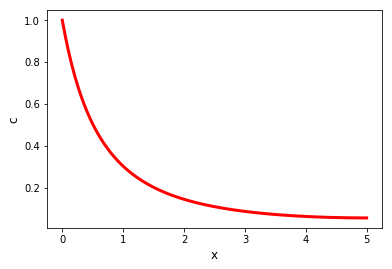

In [13]:
L = 5
N = 100
lb = 1

# note domain change
delta = L/(N-1)
D = 0.5
k = 2

def diffusion(c):
    
    retval = np.zeros(N)
    
    # right boundary
    retval[0] = lb - c[0]
    
    # interior
    for i in range(1,N-1):
        retval[i] = D/delta/delta*(c[i-1] - 2*c[i] + c[i+1]) - k*c[i]**2
    
    # left boundary
    retval[-1] = D/delta/delta*(c[-2] - c[-1]) - k*c[-1]**2
    
    return retval
    

sol = root(diffusion,np.ones(N))
c = sol.x

# define domain
x = np.linspace(0,L,N)

plt.plot(x,c,lw=3,color='r')
plt.xlabel('x',fontsize=12)
plt.ylabel('c',fontsize=12)
plt.show()
